# Ford GoBike Trip Usage dataset 

## Investigation Overview

In this investigation, we looked at the characteristics of the Ford GoBike trips. The main focus is on the effects of factors such as the user type, start time, and gender on the trip duration. We will also look at how the distribution of trip durations in the dataset is affected by these factors.

## Dataset Overview

The data consisted of approximately 183,412 bike trips provided by the Ford GoBike program in the San Francisco Bay Area. The dataset includes features such as the trip start and end time, start and end station, user type, and trip duration. There were some missing values in the dataset which were dropped.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# load in the dataset into a pandas dataframe
bike_trip = pd.read_csv('clean_bike.csv')

## Distribution of Trip by Days
The highest number of bike trips were made on Thursdays and Tuesdays, while the lowest number of trips were made on weekends (Saturday and Sunday).

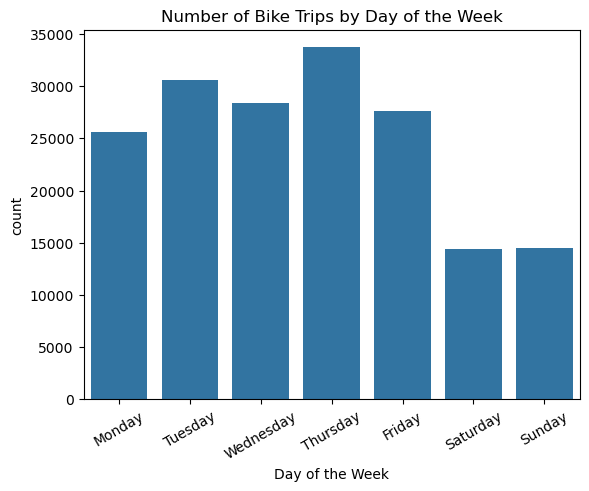

In [2]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
base_color = sns.color_palette()[0]
sns.countplot(data=bike_trip, x='start_day', color=base_color, order=day_order);
plt.xticks(rotation=30);
plt.xlabel('Day of the Week');
plt.title('Number of Bike Trips by Day of the Week');

## Distribution of Bike Trip among Users
The plot shows the count of bike trips for each user type, where the major number of the trips were taken by subscribers compared to customers.

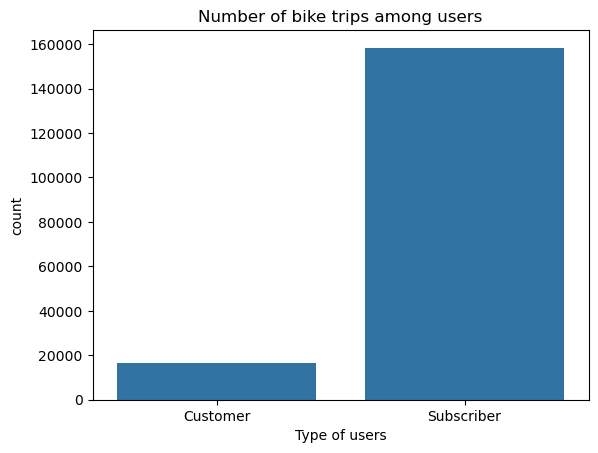

In [3]:
base_color = sns.color_palette()[0]
sns.countplot(data=bike_trip,x='user_type', color = base_color)
plt.title('Number of bike trips among users')
plt.xlabel('Type of users');

## Trip Duration vs. User Type
There are two user types in the dataset: subscribers and customers. Subscribers are users who pay a monthly subscription fee, while customers pay for individual rides. The plot suggests that the average trip duration is higher for customers than for subscribers. The average trip duration for subscribers is around 600 seconds, while for customers, it is around 1300 seconds. 

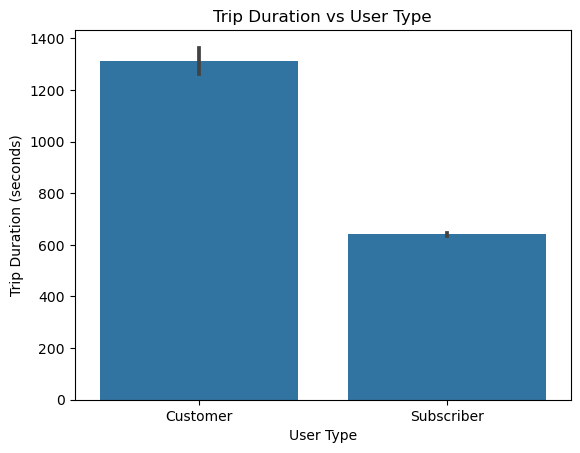

In [4]:
base_color = sns.color_palette()[0]
sns.barplot(data=bike_trip, x='user_type', y='duration_sec', color = base_color)
plt.title('Trip Duration vs User Type')
plt.xlabel('User Type')
plt.ylabel('Trip Duration (seconds)')
plt.show();

## Distribution of Bike Trips by Hour
We investigated the effect of the start time on trip counts by aggregating the number of trips by hour of the day. The plot shows that the averege trip is during commute hours (8-9am and 5-6pm) than during midday and evening hours (10am-4pm and 7pm-12am). This pattern suggests that most trips are taken during commute hours.

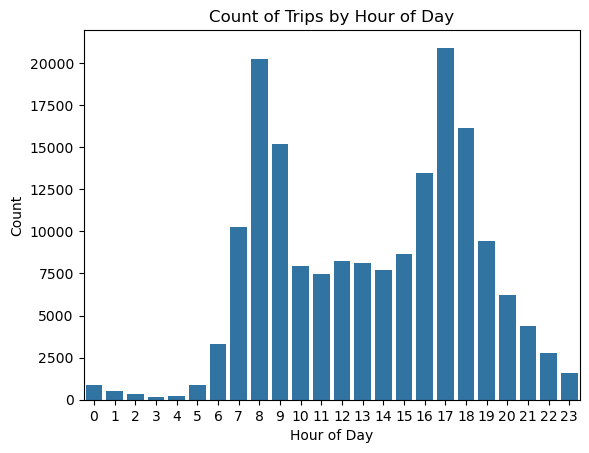

In [5]:
sns.countplot(data=bike_trip, x='start_hour', color=base_color)
plt.xlabel('Hour of Day')
plt.ylabel('Count')
plt.title('Count of Trips by Hour of Day');

## Distribution of Bike  trip by Gender
This plot shows that males are more likely to use the bike system than females or others.

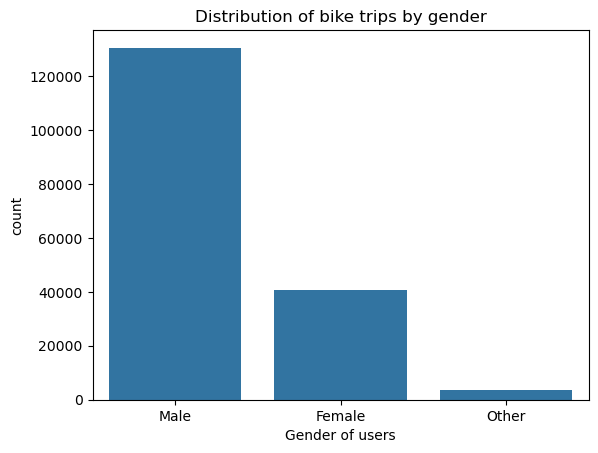

In [6]:
base_color = sns.color_palette()[0]
gender_order = bike_trip['member_gender'].value_counts().index
sns.countplot(data=bike_trip,x='member_gender', color=base_color, order=gender_order)
plt.title('Distribution of bike trips by gender')
plt.xlabel('Gender of users');

## Age distribution by user type
From the plot, subscribers tend to be slightly older on average than customers

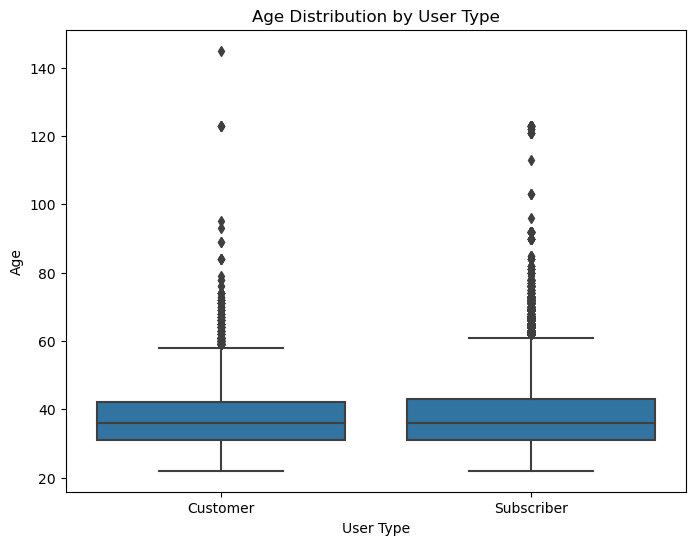

In [7]:
plt.figure(figsize=[8,6])
sns.boxplot(data = bike_trip, x = 'user_type', y = 'age', color = base_color)
plt.ylabel('Age')
plt.xlabel('User Type')
plt.title('Age Distribution by User Type');

## Trip Duration across Weekdays and User Types
From the plot, we can say that the average trip duration is generally lower on weekdays compared to weekends for both subscriber and customer user types. Additionally, subscribers tend to have shorter trip durations compared to customers on all days of the week.

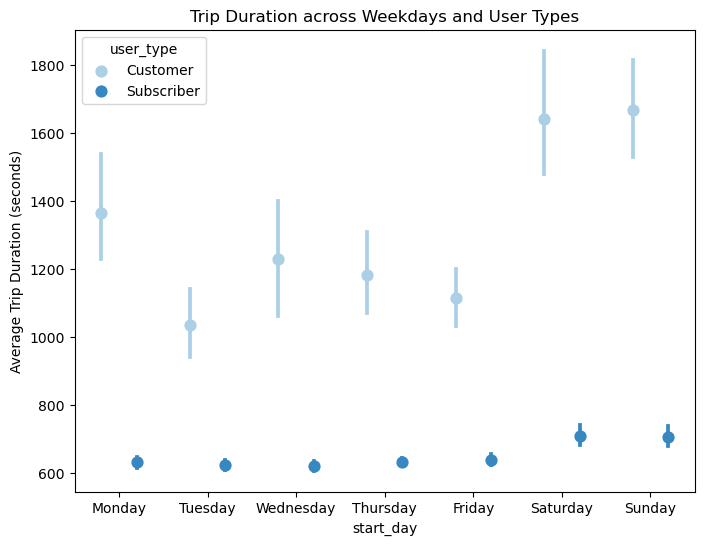

In [8]:
fig, ax = plt.subplots(figsize=[8,6])
#Define the order of the weekday
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

sns.pointplot(data=bike_trip, x='start_day', y='duration_sec', hue='user_type',
             palette='Blues', linestyles='', dodge=0.4, ax=ax, order=day_order)

ax.set_title('Trip Duration across Weekdays and User Types')
ax.set_ylabel('Average Trip Duration (seconds)')
ax.set_yticklabels([], minor=True)
plt.show()

In [ ]:
!jupyter nbconvert Bike_Trip_Project_Part2.ipynb --to slides --post serve --no-input --no-prompt